In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/filteredday/testing.csv
/kaggle/input/thesis/sep_to_dec_2010.csv
/kaggle/input/thesis/jul_to_dec_2011.csv
/kaggle/input/thesis/jan_to_jun_2009.csv
/kaggle/input/thesis/jan_to_jun_2013.csv
/kaggle/input/thesis/jan_to_jun_2014.csv
/kaggle/input/thesis/jan_to_jun_2011.csv
/kaggle/input/thesis/jan_to_jun_2015.csv
/kaggle/input/thesis/jan_to_jul_2016.csv
/kaggle/input/thesis/jan_to_jun_2012.csv
/kaggle/input/thesis/jul_to_dec_2012.csv
/kaggle/input/thesis/jul_to_dec_2013.csv
/kaggle/input/thesis/jul_to_dec_2014.csv
/kaggle/input/thesis/jul_to_dec_2009.csv
/kaggle/input/thesis/jul_to_dec_2015.csv
/kaggle/input/thesis/jan_to_aug_2010.csv


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib
import datetime as dt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [34]:
jan_to_jun_2009 = pd.read_csv("../input/thesis/jan_to_jun_2009.csv",index_col=0)
jul_to_dec_2009 = pd.read_csv("../input/thesis/jul_to_dec_2009.csv",index_col=0)
jan_to_jun_2010 = pd.read_csv("../input/thesis/jan_to_aug_2010.csv",index_col=0)
jul_to_dec_2010 = pd.read_csv("../input/thesis/sep_to_dec_2010.csv",index_col=0)
jan_to_jun_2011 = pd.read_csv("../input/thesis/jan_to_jun_2011.csv",index_col=0)
jul_to_dec_2011 = pd.read_csv("../input/thesis/jul_to_dec_2011.csv",index_col=0)
jan_to_jun_2012 = pd.read_csv("../input/thesis/jan_to_jun_2012.csv",index_col=0) 
jul_to_dec_2012 = pd.read_csv("../input/thesis/jul_to_dec_2012.csv",index_col=0)
jan_to_jun_2013 = pd.read_csv("../input/thesis/jan_to_jun_2013.csv",index_col=0)
jul_to_dec_2013 = pd.read_csv("../input/thesis/jul_to_dec_2013.csv",index_col=0)
jan_to_jun_2014 = pd.read_csv("../input/thesis/jan_to_jun_2014.csv",index_col=0)
jul_to_dec_2014 = pd.read_csv("../input/thesis/jul_to_dec_2014.csv",index_col=0)
jan_to_jun_2015 = pd.read_csv("../input/thesis/jan_to_jun_2015.csv",index_col=0)
jul_to_dec_2015 = pd.read_csv("../input/thesis/jul_to_dec_2015.csv",index_col=0)
jan_to_jul_2016 = pd.read_csv("../input/thesis/jan_to_jul_2016.csv",index_col=0)

#ALL Files are concatenated together 

df = pd.concat([jan_to_jun_2009,jul_to_dec_2009,jan_to_jun_2010,jul_to_dec_2010,jan_to_jun_2011,jul_to_dec_2011,jan_to_jun_2012,jul_to_dec_2012,jan_to_jun_2013,jul_to_dec_2013,jan_to_jun_2014,jul_to_dec_2014,jan_to_jun_2015,jul_to_dec_2015,jan_to_jul_2016],axis=0)

#Instrument type Equity is selected.

df = df.loc[df['RFDE_INSTR_TYPE'] == 'REG_DL_INSTR_EQ']

#Renaming of the column 

df = df.rename(columns={'VALUE (in Rs)': 'Sale'})

#Converting the TR_DATE columns which denotes the transaction date into date time formate. 

df['TR_DATE'] = df['TR_DATE'].astype('datetime64[D]')



df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1['Date'] = df['TR_DATE']
df1['Sale'] = df['Sale']
df2['Date'] = df['TR_DATE']
df2['Inflation-Rate'] = df['Inflation-Rate']
df2['BSE_Close'] = df['BSE_Close']
df2['FDI-Inward'] = df['FDI-Inward']
df2['IIP'] = df['IIP']
df2['unemployment-rate'] = df['unemployment-rate']
df2['forex'] = df['foreign-exchange']
df2['GDP-Growth'] = df['GDP-Growth-Rate']
df2['FDI-Growth'] = df['FDI-Growth-Rate']
df2['twitter'] = df['twitter-sentiment']


#Data is day wise distributed. Thus summing together to get the total sum of Equity instrument sold per day 

df1 = df1.groupby(['Date']).sum()

df1 = df1.reset_index(level='Date')

#Getting the exact value of different macro-economic variables per day. 

df2 = df2.groupby(['Date'], as_index=False).mean()


#Formulating the dataset with columns Date, Sale, and macro-economic variables. 

df1['BSE_Close'] = df1['Date'].map(df2.set_index('Date')['BSE_Close'])
df1['FDI-Inward'] = df1['Date'].map(df2.set_index('Date')['FDI-Inward'])

df1['IIP'] = df1['Date'].map(df2.set_index('Date')['IIP'])
df1['forex'] = df1['Date'].map(df2.set_index('Date')['forex'])
df1['twitter'] = df1['Date'].map(df2.set_index('Date')['twitter'])
df1['Unemployment-Rate'] = df1['Date'].map(df2.set_index('Date')['unemployment-rate'])
df1['Inflation-Rate'] = df1['Date'].map(df2.set_index('Date')['Inflation-Rate'])
df1['GDP-Growth'] = df1['Date'].map(df2.set_index('Date')['GDP-Growth'])
df1['FDI-Growth'] = df1['Date'].map(df2.set_index('Date')['FDI-Growth'])

test = df1
test['Unemployment-Rate'] = test['Unemployment-Rate'].replace(to_replace=0, method='ffill')
test['FDI-Inward'] = test['FDI-Inward'].fillna(method='ffill')


#For the year 2009 there are 3 dates for which twitter sentiment is missing. They are replaced by the previous values.

test['twitter'] = test['twitter'].replace(to_replace=-3.000000, method='ffill')


abc = pd.DataFrame(data=test.values,columns=test.columns)

#The column of Stock Sale is deleted and Column of Date is deleted, before passing it to the autoencoder 

del test['Date']
del test['Sale']
data = []
data = test
del df['CUST']
del df['SE']
del df['Year-Month']


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
filtered = pd.read_csv("../input/filteredday/testing.csv",index_col=0)

In [36]:
filtered = filtered.reset_index(level='Date')

In [37]:
filtered

,Date,Day,Sale,BSE_Close,FDI-Inward,IIP,forex,twitter,Unemployment-Rate,Inflation-Rate,GDP-Growth,FDI-Growth
0,2009-01-01,Thursday,3.343394e+09,3426.76,35582.37047,80.07885,48.2825,-0.012983,5.566,10.447760,7.861882,0.20
1,2009-01-02,Friday,1.542561e+10,3232.11,35582.37047,80.07885,48.2500,-0.012983,5.566,10.447760,7.861882,0.20
2,2009-01-05,Monday,2.901384e+10,5520.25,35582.37047,80.07885,48.5000,0.082790,5.566,10.447760,7.861882,0.20
3,2009-01-06,Tuesday,4.101809e+10,5492.03,35582.37047,80.07885,48.5000,0.066852,5.566,10.447760,7.861882,0.20
4,2009-01-07,Wednesday,5.933185e+10,5940.38,35582.37047,80.07885,48.5600,0.037050,5.566,10.447760,7.861882,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
2047,2016-07-25,Monday,9.187946e+10,11585.96,44458.57155,105.20730,67.4100,0.111160,5.511,6.463878,8.169527,0.23
2048,2016-07-26,Tuesday,1.030000e+11,11585.96,44458.57155,105.20730,67.3400,0.162008,5.511,6.463878,8.169527,0.23
2049,2016-07-27,Wednesday,9.299072e+10,11585.96,44458.57155,105.20730,67.1400,0.029116,5.511,6.463878,8.169527,0.23
2050,2016-07-28,Thursday,1.520000e+11,11585.96,44458.57155,105.20730,66.9600,-0.037010,5.511,6.463878,8.169527,0.23


In [38]:
filtered['Date'] = filtered['Date'].astype('datetime64[D]')

In [39]:
abc['Day'] = abc['Date'].map(filtered.set_index('Date')['Day'])

In [40]:
abc = abc[abc.Day != 'Saturday']

In [41]:
abc = abc[abc.Day != 'Sunday']

In [42]:
abc = abc.reset_index()

In [43]:
abc = abc.drop(['index'],axis=1)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


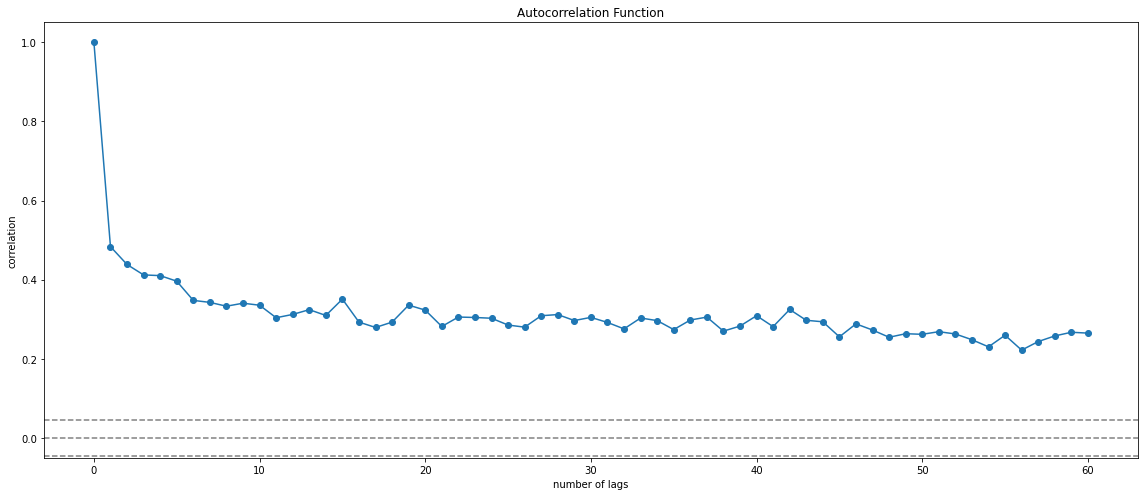

In [44]:
from statsmodels.tsa.stattools import acf, pacf

#calling acf function from stattools
lag_acf = acf(abc['Sale'], nlags=60)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(abc['Sale'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(abc['Sale'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

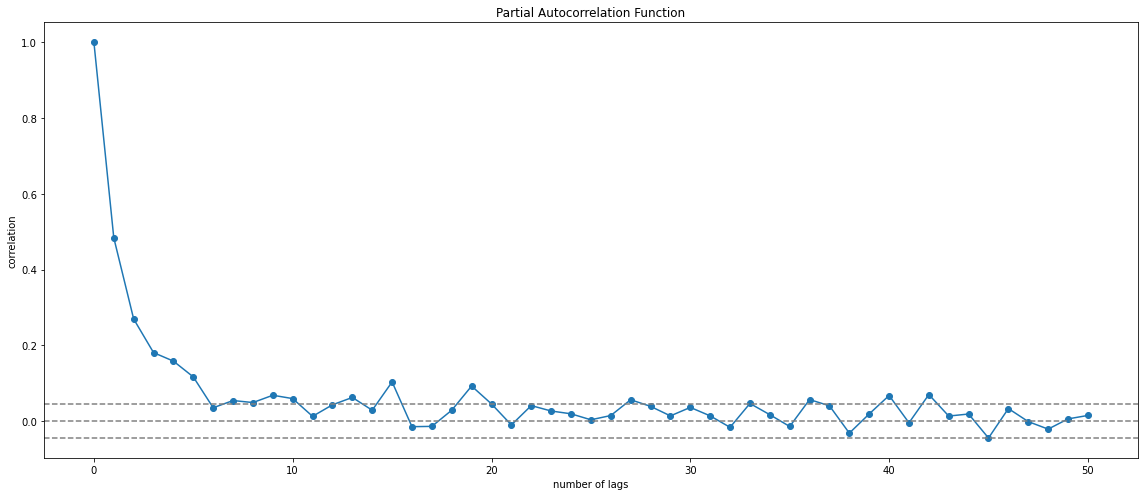

In [45]:
lag_pacf = pacf(abc['Sale'], nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(abc['Sale'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(abc['Sale'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [46]:

#GDP-Growth, Inflation-Rate, Unemployment-Rate are percentage values given in whole number formate.    

data['GDP-Growth'] = data['GDP-Growth'].div(100)
data['Inflation-Rate'] = data['Inflation-Rate'].div(100)
data['Unemployment-Rate'] = data['Unemployment-Rate'].div(100)

data_Unemployment_Rate = data['Unemployment-Rate'].to_numpy()
data_Unemployment_Rate = data_Unemployment_Rate.reshape(len(data_Unemployment_Rate),1)
data_Inflation_Rate = data['Inflation-Rate'].to_numpy()
data_Inflation_Rate = data_Inflation_Rate.reshape(len(data_Inflation_Rate),1)
data_GDP_Growth = data['GDP-Growth'].to_numpy()
data_GDP_Growth = data_GDP_Growth.reshape(len(data_GDP_Growth),1)
data_FDI_Growth = data['FDI-Growth'].to_numpy()
data_FDI_Growth = data_FDI_Growth.reshape(len(data_FDI_Growth),1)

data_forex = data.forex.values
data_forex = data_forex.reshape(len(data_forex),1)
data_IIP = data.IIP.values
data_IIP = data_IIP.reshape(len(data_forex),1)
data_FDI_Inward = data['FDI-Inward'].values
data_FDI_Inward = data_FDI_Inward.reshape(len(data_forex),1)
data_BSE_Close = data.BSE_Close.values
data_BSE_Close = data_BSE_Close.reshape(len(data_BSE_Close),1)
data_twitter = data['twitter'].to_numpy()
data_twitter = data_twitter.reshape(len(data_twitter),1)


# BSE_Close, FDI_inward, IIP, foreign-exchange are normalized using minmax scaler 

scaler1 = MinMaxScaler(feature_range=(0, 1))
data_BSE_Close_normalize = scaler1.fit_transform(data_BSE_Close)
scaler2 = MinMaxScaler(feature_range=(0, 1))
data_FDI_Inward_normalize = scaler2.fit_transform(data_FDI_Inward)
scaler3 = MinMaxScaler(feature_range=(0, 1))
data_IIP_normalize = scaler3.fit_transform(data_IIP)
scaler4 = MinMaxScaler(feature_range=(0, 1))
data_forex_normalize = scaler4.fit_transform(data_forex)
#scaler5 = MinMaxScaler(feature_range=(0,1))
#data_twitter_normalize = scaler5.fit_transform(data_twitter)

#All of the normalized data plus percentage valued features are concatenated together 

data_normalize = np.concatenate((data_BSE_Close_normalize,data_FDI_Inward_normalize,data_IIP_normalize,data_forex_normalize,data_twitter,data_Unemployment_Rate,data_Inflation_Rate,data_GDP_Growth,data_FDI_Growth),axis=1)




from keras import optimizers
from matplotlib import pyplot
from keras.layers import Dropout
import tensorflow as tf
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras.layers import LeakyReLU
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Dense
from keras.layers.recurrent import LSTM

batch = 19
lr = 0.0001
X_train = data_normalize.reshape((data_normalize.shape[0],1,data_normalize.shape[1]))

visible1 = Input(shape=(1,9))

#Layer 1

hidden1 = LSTM(50,activation='tanh',input_shape=(1,9),return_sequences=True)(visible1)



#Layer 2

hidden2 = LSTM(1,activation='tanh')(hidden1)


#Layer 3

repeatvector = RepeatVector(1, name="repeater")(hidden2)


#Layer 4

hidden3 = LSTM(50,activation='tanh', return_sequences=True)(repeatvector)





#Layer 5

output = Dense(9)(hidden3)

model_autoencoder = Model(inputs=visible1,outputs=output)

adam = optimizers.Adam(lr)

model_autoencoder.compile(loss='mse', optimizer=adam)


print(model_autoencoder.summary())

model_autoencoder.fit(X_train, X_train, epochs=200,batch_size=batch,verbose=1)

encoder = Model(inputs=visible1, outputs=[hidden2])
train_encoded = encoder.predict(X_train)

yhat = model_autoencoder.predict(X_train)


yhat = yhat.reshape(2052,9)
array1 = yhat[:,:1]
array2 = yhat[:,1:2]
array3 = yhat[:,2:3]
array4 = yhat[:,3:4]
array5 = yhat[:,4:5]

array1 = scaler1.inverse_transform(array1)
array2 = scaler2.inverse_transform(array2)
array3 = scaler3.inverse_transform(array3)
array4 = scaler4.inverse_transform(array4)
#array5 = scaler5.inverse_transform(array5)

data_encoder = np.concatenate((array1,array2,array3,array4,yhat[:,4:],),axis=1)




Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 9)              0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 50)             12000     
_________________________________________________________________
lstm_11 (LSTM)               (None, 1)                 208       
_________________________________________________________________
repeater (RepeatVector)      (None, 1, 1)              0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 1, 50)             10400     
_________________________________________________________________
dense_4 (Dense)              (None, 1, 9)              459       
Total params: 23,067
Trainable params: 23,067
Non-trainable params: 0
_______________________________________________________

2052/2052 [==============================] - 0s 191us/step - loss: 0.0146
Epoch 83/200
2052/2052 [==============================] - 0s 189us/step - loss: 0.0146
Epoch 84/200
2052/2052 [==============================] - 0s 187us/step - loss: 0.0146
Epoch 85/200
2052/2052 [==============================] - 0s 183us/step - loss: 0.0146
Epoch 86/200
2052/2052 [==============================] - 0s 186us/step - loss: 0.0146
Epoch 87/200
2052/2052 [==============================] - 0s 196us/step - loss: 0.0146
Epoch 88/200
2052/2052 [==============================] - 0s 191us/step - loss: 0.0146
Epoch 89/200
2052/2052 [==============================] - 0s 185us/step - loss: 0.0146
Epoch 90/200
2052/2052 [==============================] - 0s 191us/step - loss: 0.0146
Epoch 91/200
2052/2052 [==============================] - 0s 196us/step - loss: 0.0146
Epoch 92/200
2052/2052 [==============================] - 0s 188us/step - loss: 0.0146
Epoch 93/200
2052/2052 [==============================] 

2052/2052 [==============================] - 0s 187us/step - loss: 0.0114
Epoch 176/200
2052/2052 [==============================] - 0s 181us/step - loss: 0.0113
Epoch 177/200
2052/2052 [==============================] - 0s 213us/step - loss: 0.0112
Epoch 178/200
2052/2052 [==============================] - 0s 218us/step - loss: 0.0111
Epoch 179/200
2052/2052 [==============================] - 0s 200us/step - loss: 0.0110
Epoch 180/200
2052/2052 [==============================] - 0s 186us/step - loss: 0.0109
Epoch 181/200
2052/2052 [==============================] - 0s 187us/step - loss: 0.0108
Epoch 182/200
2052/2052 [==============================] - 0s 197us/step - loss: 0.0107
Epoch 183/200
2052/2052 [==============================] - 0s 184us/step - loss: 0.0106
Epoch 184/200
2052/2052 [==============================] - 0s 186us/step - loss: 0.0106
Epoch 185/200
2052/2052 [==============================] - 0s 182us/step - loss: 0.0105
Epoch 186/200
2052/2052 [=====================

In [47]:
df_test_forecast = pd.DataFrame()
df_test_forecast['Sale'] = abc['Sale']
df_test_forecast['Date'] = abc['Date']









In [48]:
train_encoded_feature = pd.DataFrame(data=train_encoded)
train_encoded_feature['Date'] = filtered['Date']

In [49]:
df_test_forecast['encoded-feature'] = df_test_forecast['Date'].map(train_encoded_feature.set_index('Date')[0])

In [50]:
df_test_forecast = df_test_forecast.drop(['Date'],axis=1)

In [51]:
df_test_forecast

,Sale,encoded-feature
0,3.34339e+09,-0.690697
1,1.54256e+10,-0.691490
2,2.90138e+10,-0.682502
3,4.10181e+10,-0.682254
4,5.93318e+10,-0.678548
...,...,...
1863,9.18795e+10,0.742627
1864,1.033e+11,0.742231
1865,9.29907e+10,0.742504
1866,1.52466e+11,0.742466


In [52]:
xyz = df_test_forecast.values

In [53]:
xyz[1866,0]

152466001358.69943

In [54]:
type(xyz)

numpy.ndarray

In [55]:
test2 = pd.DataFrame()
test2 = df_test_forecast

from pandas import Series

test2['diff-sale'] = test2['Sale'].diff(1)
test2 = test2.dropna()

test2 = test2.reset_index()

del test2['index']




In [56]:
del test2['Sale']

In [57]:
test2 = test2[['diff-sale','encoded-feature']]

In [58]:
test2

,diff-sale,encoded-feature
0,1.20822e+10,-0.691490
1,1.35882e+10,-0.682502
2,1.20043e+10,-0.682254
3,1.83138e+10,-0.678548
4,-1.23957e+09,-0.673188
...,...,...
1862,1.99219e+10,0.742627
1863,1.14208e+10,0.742231
1864,-1.03095e+10,0.742504
1865,5.94753e+10,0.742466


Train on 1000 samples, validate on 856 samples
Epoch 1/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1077 - val_loss: 0.0437
Epoch 2/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0033 - val_loss: 0.0304
Epoch 3/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0027 - val_loss: 0.0218
Epoch 4/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 0.0173
Epoch 5/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 0.0145
Epoch 6/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0015 - val_loss: 0.0127
Epoch 7/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0013 - val_loss: 0.0114
Epoch 8/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0012 - val_loss: 0.0103
Epoch 9/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0012 - val_loss: 0.0095
Epoch 10/200
1000/1000 [==

1000/1000 [==============================] - 1s 1ms/step - loss: 9.4937e-04 - val_loss: 0.0035
Epoch 78/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.4899e-04 - val_loss: 0.0035
Epoch 79/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.4863e-04 - val_loss: 0.0035
Epoch 80/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.4827e-04 - val_loss: 0.0035
Epoch 81/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.4793e-04 - val_loss: 0.0035
Epoch 82/200
1000/1000 [==============================] - 2s 2ms/step - loss: 9.4760e-04 - val_loss: 0.0035
Epoch 83/200
1000/1000 [==============================] - 6s 6ms/step - loss: 9.4728e-04 - val_loss: 0.0035
Epoch 84/200
1000/1000 [==============================] - 2s 2ms/step - loss: 9.4697e-04 - val_loss: 0.0035
Epoch 85/200
1000/1000 [==============================] - 2s 2ms/step - loss: 9.4667e-04 - val_loss: 0.0035
Epoch 86/200
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/step - loss: 9.2620e-04 - val_loss: 0.0033
Epoch 153/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.2574e-04 - val_loss: 0.0033
Epoch 154/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.2528e-04 - val_loss: 0.0033
Epoch 155/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.2480e-04 - val_loss: 0.0033
Epoch 156/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.2432e-04 - val_loss: 0.0033
Epoch 157/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.2382e-04 - val_loss: 0.0033
Epoch 158/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.2331e-04 - val_loss: 0.0033
Epoch 159/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.2278e-04 - val_loss: 0.0033
Epoch 160/200
1000/1000 [==============================] - 1s 1ms/step - loss: 9.2225e-04 - val_loss: 0.0033
Epoch 161/200
1000/1000 [========

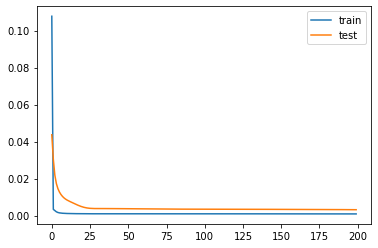

In [59]:
from numpy import array
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    #print(len(sequences))
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
		# gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix -1,:], sequences[end_ix -1,0]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



array_test_forecast = test2.iloc[:1859,0:].to_numpy()
xforecast = test2.iloc[1859:1866,0:].to_numpy()

scaler10 = MinMaxScaler(feature_range=(0, 1))
scaler10 = scaler10.fit(array_test_forecast[:,:1])
normalized_values = scaler10.transform(array_test_forecast[:,:1])

scaler11 = MinMaxScaler(feature_range=(0, 1))
scaler11 = scaler11.fit(xforecast[:,:1])
normalized_values_x_forcaste = scaler11.transform(xforecast[:,:1])

normalized_values_forecast = np.concatenate((normalized_values,array_test_forecast[:,1:2]),axis=1)
x_forecaste_normalize = np.concatenate((normalized_values_x_forcaste,xforecast[:,1:2]),axis=1)

xForTesting, yForTesting = split_sequences(normalized_values_forecast,6)

xt = xForTesting[:1000,:,:]
yt = yForTesting[:1000]
xv = xForTesting[1000:,:,:]
yv=yForTesting[1000:]

n_features = xForTesting.shape[2]


model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(7, n_features)))
model.add(LSTM(100, activation='tanh', return_sequences=True))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(1))
adam = optimizers.Adam(lr)
model.compile(loss='mse', optimizer=adam)
# fit model
history = model.fit(xt, yt,validation_data=(xv, yv),epochs=200,batch_size = 10,verbose=1,shuffle=False)
# demonstrate prediction


pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()



x_forecaste_normalize = x_forecaste_normalize.reshape((1, len(x_forecaste_normalize), 2))
yhat = model.predict(x_forecaste_normalize, verbose=0)

z = np.zeros((1,1), dtype=int)

yhat = np.append(yhat,z,axis=1)

yhat = scaler11.inverse_transform(yhat[:,0:1])



In [62]:
forecast = yhat + xyz[1866,0]

In [63]:
forecast

array([[1.79178971e+11]])